In [0]:
import torchvision.transforms
transorm=transforms.Compose([
                             transforms.RandomHorizontalFlip(p=0.5),
                             transforms.Normalize(0.5,1, inplace=False)
])
                            

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, 
                                        download=True, 
                                        transform=transorm)

In [0]:
classes = ('T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot')

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

In [0]:
def imshow(img): 
  npimg = img.numpy()
  npimg = np.transpose(npimg, (1,2,0))
  plt.figure(figsize=(8,8))
  plt.imshow(np.squeeze(npimg))
  plt.show()

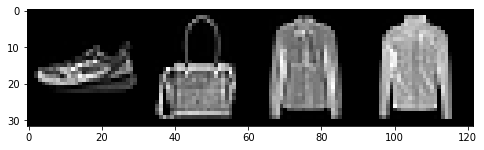

Dress            Trouser            Dress            Pullover


In [29]:
imshow(torchvision.utils.make_grid(images))
print('            '.join(classes[labels[j]] for j in range(4)))

In [42]:
device='cpu'
print(device)

cpu


In [0]:
import torch.nn as nn
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),         # (N, 1, 28, 28) -> (N, 32, 28, 28)
            nn.ReLU(),
            nn.BatchNorm2d(32),
            #nn.Dropout(0.5),
            nn.MaxPool2d(2, stride=2),  # (N, 32, 28, 28) -> (N,32, 14, 14)
            nn.Conv2d(32, 32, 3,padding=1),        # (N,32, 14, 14) -> (N, 32, 14, 14)  
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(0.5),
            nn.Conv2d(32, 32, 5),       # (N,32, 14, 14) -> (N, 32, 10, 10)
            nn.BatchNorm2d(32),
            nn.Dropout(0.5),
            nn.Conv2d(32, 64, 3,padding=1),       # (N,32, 10, 10) -> (N, 64, 10, 10)
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, stride=2),   # (N,64, 10, 10) -> (N, 64, 5, 5)
            nn.Conv2d(64, 64, 3),       # (N,64, 5, 5) -> (N, 64, 3, 3)
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, 5,padding=2),       # (N,64, 3, 3) -> (N, 64, 3, 3)
            nn.Dropout(0.5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(576,400),          # (N, 576) -> (N, 400)
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(400,120),          # (N, 400) -> (N, 120)
            nn.ReLU(),
            nn.Linear(120,84),          # (N, 400) -> (N, 120)
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(84,10)              # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [0]:
batch_size = 128
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
net = LeNet().to(device) 

In [0]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [0]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 24

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

In [0]:
images=images.to(device)
out_img = net(images)

In [0]:
pred = torch.argmax(out_img, dim=1)

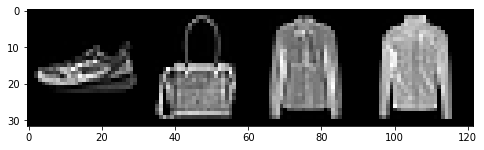

Sneaker        Bag        Shirt        Coat


In [53]:
imshow(torchvision.utils.make_grid(images))
print('        '.join(classes[pred[j].item()] for j in range(4)))